# Survivability of of patients with heart failure from Serum Creatinine and Ejection friction

## Paper: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone

### By: Davide Chicco & Giuseppe Jurman
363 Total Citations |
Highly Influential Citations 37 |
Background Citations 98 |
Methods Citations 97 |
Results Citations 20

#### Description: Analysis of a dataset of 299 patients with heart failure collected in 2015 shows that serum creatinine and ejection fraction are sufficient to predict survival of heart failure patients from medical records
******************************
The dataset contains a table of 13 features including the death event ( death event is considered as the target).
Thirteen (13) clinical features:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- creatinine phosphokinase  (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction  (percentage)
- high blood pressure: if the patient has hypertension (boolean)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient died during the follow-up period (boolean)
*Note: the above text is taken from the uci dataset page*

Dataset is available at : https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

In this assessment we will cover few topics that are listed below:
1. Exploring the dataset
2. Visualizing graphs of columns (where it applies)
3. Data preparation
4. Training 3 different models (LogisticRegression,DecisionTreeClassifier,RandomForestClassifier)
5. Compare results with a ROC curve


The target result (death event) will consist of a binary value (0,1) meaning if the patient died during the follow-up period
*****************************

### What is the paper about:
Cardiovascular disorders kill around 17 million people worldwide each year, primarily from myocardial infarctions and heart failure. Heart failure (HF) develops when the heart is unable to pump enough blood to meet the body's needs.Patients' electronic medical records measure symptoms, physical attributes, and clinical laboratory test data, allowing enabling biostatistics analysis to identify patterns and connections that would otherwise go undetected by medical doctors. Machine learning, in particular, can estimate patient survival based on data and identify the most essential aspects in their medical records.
they analyze a data set of 299 patients with heart failure from 2015 and the results are concluded that serum creatinine and ejection fraction are sufficient to make a prediction even rather than using the whole dataset. They use The classifiers include one linear statistical method (Linear Regression ), three tree-based methods (Random Forests , One Rule , Decision Tree), one Artificial Neural Network (perceptron ), two Support Vector Machines (linear, and with Gaussian radial kernel), one instance-based learning model (k-Nearest Neighbors ), one probabilistic classifier (Naïve Bayes ), and an ensemble boosting method (Gradient Boosting ).

********************************
Student : Alexandru Lapos
email: a.lapos@rgu.ac.uk
github: https://github.com/fallenfal/ML-assesment

*Note: in case the Jupyter file fails or the HTML file is badly formated , the github link has all the information ready to present*




#### 1.Importing the required libraries and exploring the dataset
1.1 Importing Libraries



In [177]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1.2 Visually explore the values and columns of the dataset to make sense exactly what the dataset is about.



In [178]:
df = pd.read_csv("data/heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


1.3 Checking all the columns and rows to see if the set is the same as the one used in the research paper, also displaying all the columns.



In [179]:

print(f'The dataset contains {df.shape[0]} rows, and {df.shape[1]} columns')

The dataset contains 299 rows, and 13 columns


In [180]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

1.4 Data Exploration <br>
Now that we know what columns we have and we have an idea what data they hold , is time to check the whole set for missing values and t check what type of value they are (int, object, float, etc) <br>
Using Pandas dataframe info function we see that we have the same amount of columns as in previous exploration .<br>
We can also see that we have only int and float values and no empty/missing values. If it would of happen to have empty values we could of filled them with mean or median values to not make our model faulty.


In [181]:
# and check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [182]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

1.4 Data Exploration<br>
Continuing with our exploration is recommended to check also the unique values that the columns hold , we know that some of the values are binary but we need to check what values other have, we do this by looping thru each column and printing the unique values of that column.
And also view those that have 2 values, usually those are that are boolean.


In [183]:
# for every column we loop and display
for i in df.columns:
    # print how many features it has
    print(i,len(df[i].unique()))

age 47
anaemia 2
creatinine_phosphokinase 208
diabetes 2
ejection_fraction 17
high_blood_pressure 2
platelets 176
serum_creatinine 40
serum_sodium 27
sex 2
smoking 2
time 148
DEATH_EVENT 2


In [184]:
# print these unique values for columns that have 2 unique values
# loop over every column
for i in df.columns:
    # print how many features it has
    if len(df[i].unique())<3:
        print(f'{i} has {len(df[i].unique())} unique values, These are: {df[i].unique()}')

anaemia has 2 unique values, These are: [0 1]
diabetes has 2 unique values, These are: [0 1]
high_blood_pressure has 2 unique values, These are: [1 0]
sex has 2 unique values, These are: [1 0]
smoking has 2 unique values, These are: [0 1]
DEATH_EVENT has 2 unique values, These are: [1 0]


1.4 Data Exploration<br>
Another descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset's distribution, we can visualize the mean, max, min.

In [185]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [186]:
# number of rows of people in the dataset with age<51
n = df[df.age<51].shape[0]
print(f"As we can see, around {n} out of 299 are of age lower than 51, that is of around 25%, as shown in the table above")
# print the percentage of those
print ('Percentage of people under the age of 51 is ', round(n/df.shape[0],2)*100)


As we can see, around 74 out of 299 are of age lower than 51, that is of around 25%, as shown in the table above
Percentage of people under the age of 51 is  25.0


We can go even further if we want to find out the quantile , example below show the 10%, 25%,50%,75%

In [187]:
df.quantile([.1, .25, .5, .75], axis = 0)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0.10,45.0,0.0,67.6,0.0,25.0,0.0,153000.0,0.8,132.0,0.0,0.0,26.8,0.0
0.25,51.0,0.0,116.5,0.0,30.0,0.0,212500.0,0.9,134.0,0.0,0.0,73.0,0.0
0.50,60.0,0.0,250.0,0.0,38.0,0.0,262000.0,1.1,137.0,1.0,0.0,115.0,0.0
0.75,70.0,1.0,582.0,1.0,45.0,1.0,303500.0,1.4,140.0,1.0,1.0,203.0,1.0


One of the important things you always need to check in your dataset, is the class distribution. This is an important research problem, and if the class-distribution of the dataset is largely imbalanced, then it could affect the performance of the machine learning algorithm.

In [188]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

#### 2.1 Visualizing graphs<br>
Using Seaborn we can create graphs using meaningful names from the dataset and plot them so we can visualize the distribution.

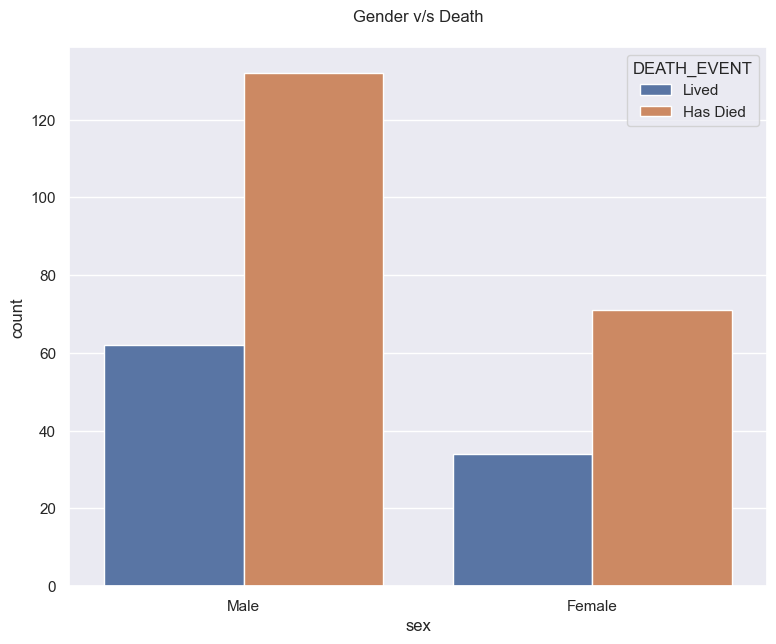

In [189]:
sns.set_style('whitegrid')
sns.set_palette("hls", 8)

# first we make a copy of the dataset to decode the variables (for visualisation purposes)
dfC = df.copy()
# simple function to change sex values -
def sexValue(sex):
    if sex == 0:
        return 'Female'
    else:
        return 'Male'

# apply the above lambda function to the whole column in the dataset
dfC['sex'] = dfC['sex'].apply(sexValue)
# function to change taget
def targetValue(label):
    if label == 0:
        return 'Has Died'
    else:
        return 'Lived'
dfC['DEATH_EVENT'] = dfC['DEATH_EVENT'].apply(targetValue)

sns.set_theme(rc={'figure.figsize':(9,7)})

sns.countplot(data= dfC, x='sex',hue='DEATH_EVENT')
plt.title('Gender v/s Death\n')
plt.show()

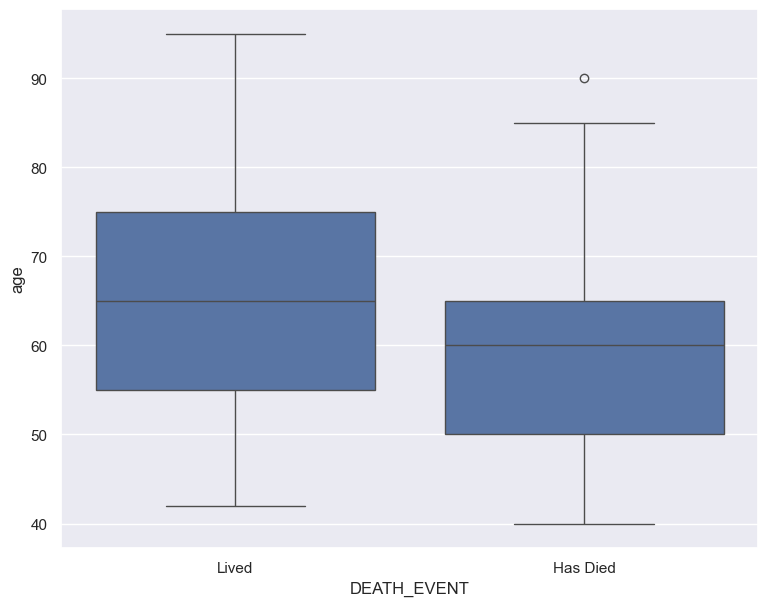

Percentage of Patients that have died is 67.89
Percentage of Patients that lived is 32.11


In [190]:
sns.boxplot(data=dfC,x='DEATH_EVENT',y='age')
plt.show()

patients_dead = len(df[df.DEATH_EVENT==0])
patients_alive = len(df[df.DEATH_EVENT==1])
print(f'Percentage of Patients that have died is {round(patients_dead/df.shape[0]*100,2)}' )
print(f'Percentage of Patients that lived is {round(patients_alive/df.shape[0]*100,2)}' )

We also plot a histogram of our numerical dataset , trying to exclude the binary one because they are just ones and zeros, we kep only sex because its more relevant.

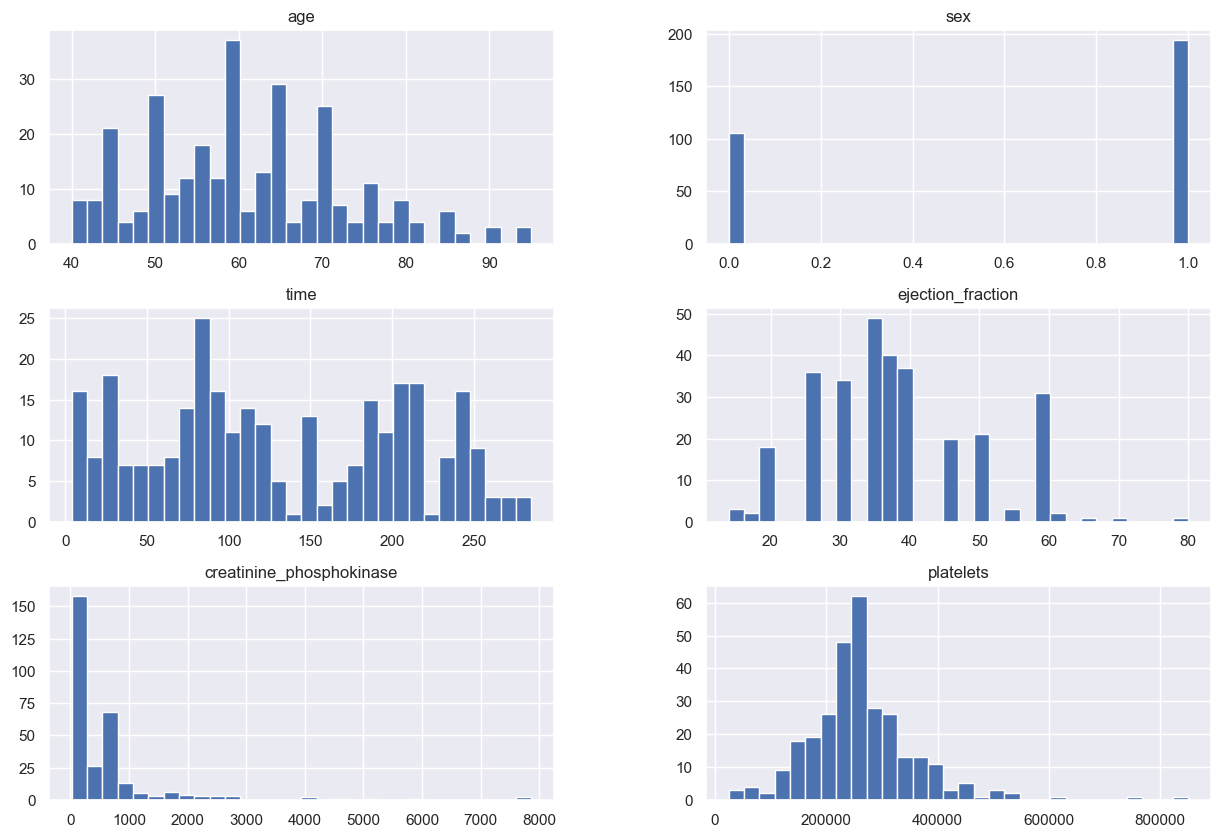

In [191]:
numerical_vals = ['age','sex','time','ejection_fraction','creatinine_phosphokinase','platelets']
# Manually selected the numerical values using information from previous functions.
df[numerical_vals].hist(bins=30,figsize=(15,10))
plt.show()

You can also use seaborn to produce various types of plots to gain more insight about the dataset.  Below is a plot for the age distribution with a density curve:


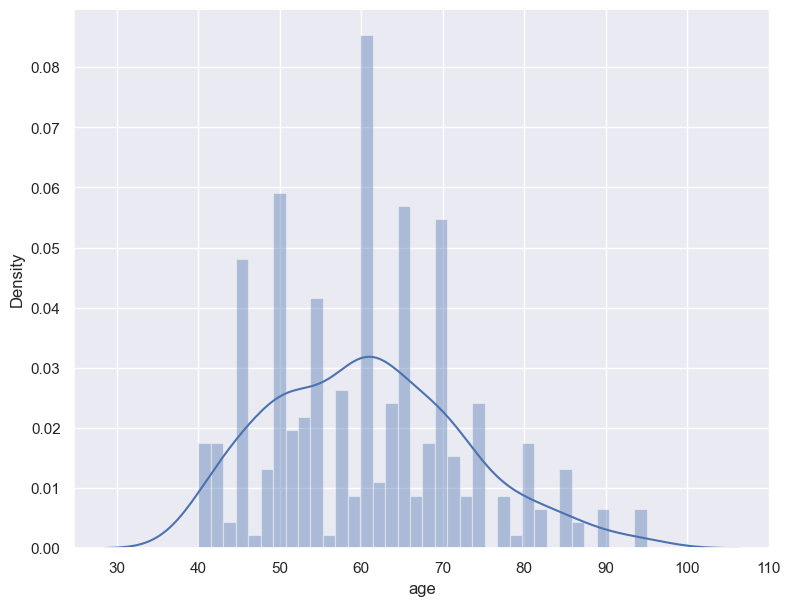

In [192]:
sns.set_style(style="darkgrid")
sns.histplot(
    df["age"], kde=True,
    bins=int(180/5),
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)
plt.show()

We can also see the other features comparing wit the age

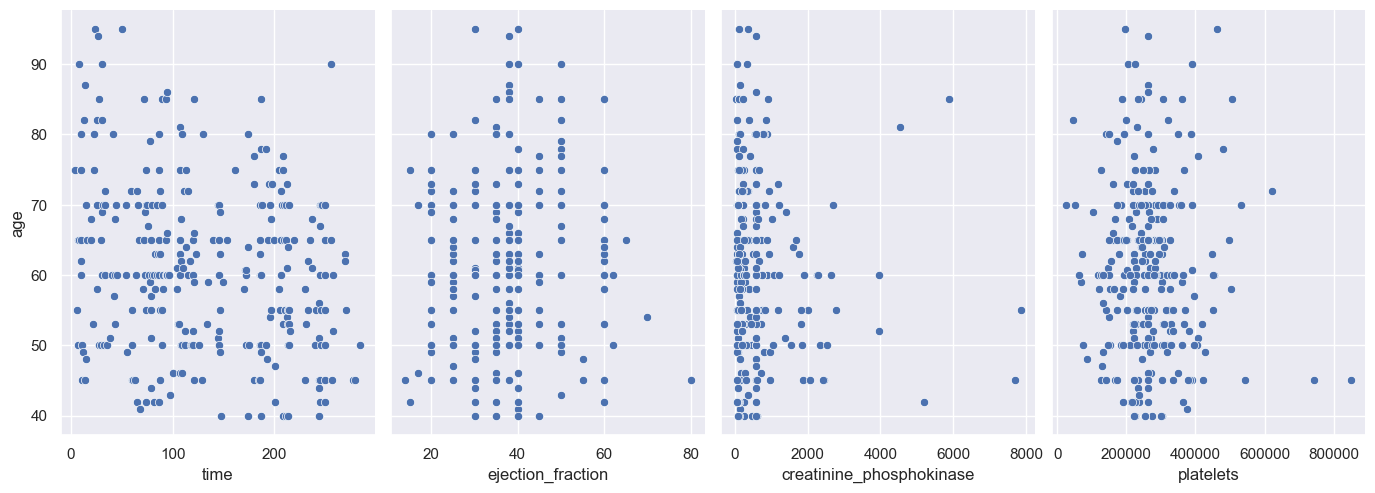

In [193]:
sns.set_style("darkgrid")
sns.pairplot(df, x_vars=['time','ejection_fraction','creatinine_phosphokinase','platelets'], y_vars='age', height=5, aspect=0.7)

Correlations: It is usually worthwhile to investigate correlations between features in your dataset. The simplest method to achieve this is to use the pandas DataFrame's corr() function. Note that this function only calculates the correlation coefficient between numerical features.

In [194]:
corr_mat= df.corr(numeric_only = True)
corr_mat

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


Now you can readily see how particular attributes link to the rest of the attributes. Take a look at the age and ex characteristic, and you will note  connected is with any of the other attributes.

In [195]:
# sex attribute
corr_mat['sex'].sort_values(ascending=False)

sex                         1.000000
smoking                     0.445892
creatinine_phosphokinase    0.079791
age                         0.065430
serum_creatinine            0.006970
DEATH_EVENT                -0.004316
time                       -0.015608
serum_sodium               -0.027566
anaemia                    -0.094769
high_blood_pressure        -0.104615
platelets                  -0.125120
ejection_fraction          -0.148386
diabetes                   -0.157730
Name: sex, dtype: float64

In [196]:
# age attribute
corr_mat['age'].sort_values(ascending=False)

age                         1.000000
DEATH_EVENT                 0.253729
serum_creatinine            0.159187
high_blood_pressure         0.093289
anaemia                     0.088006
sex                         0.065430
ejection_fraction           0.060098
smoking                     0.018668
serum_sodium               -0.045966
platelets                  -0.052354
creatinine_phosphokinase   -0.081584
diabetes                   -0.101012
time                       -0.224068
Name: age, dtype: float64

Below we see the top correlations , we see that the top correlations with our target are time and serum_creatinite, this indicates these 2 factors are a leading cause of out target.

In [197]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 3))

Top Absolute Correlations
time              DEATH_EVENT    0.526964
sex               smoking        0.445892
serum_creatinine  DEATH_EVENT    0.294278
dtype: float64


Another way to see correlations is to ue pandas scatter matric with our numeric values columns

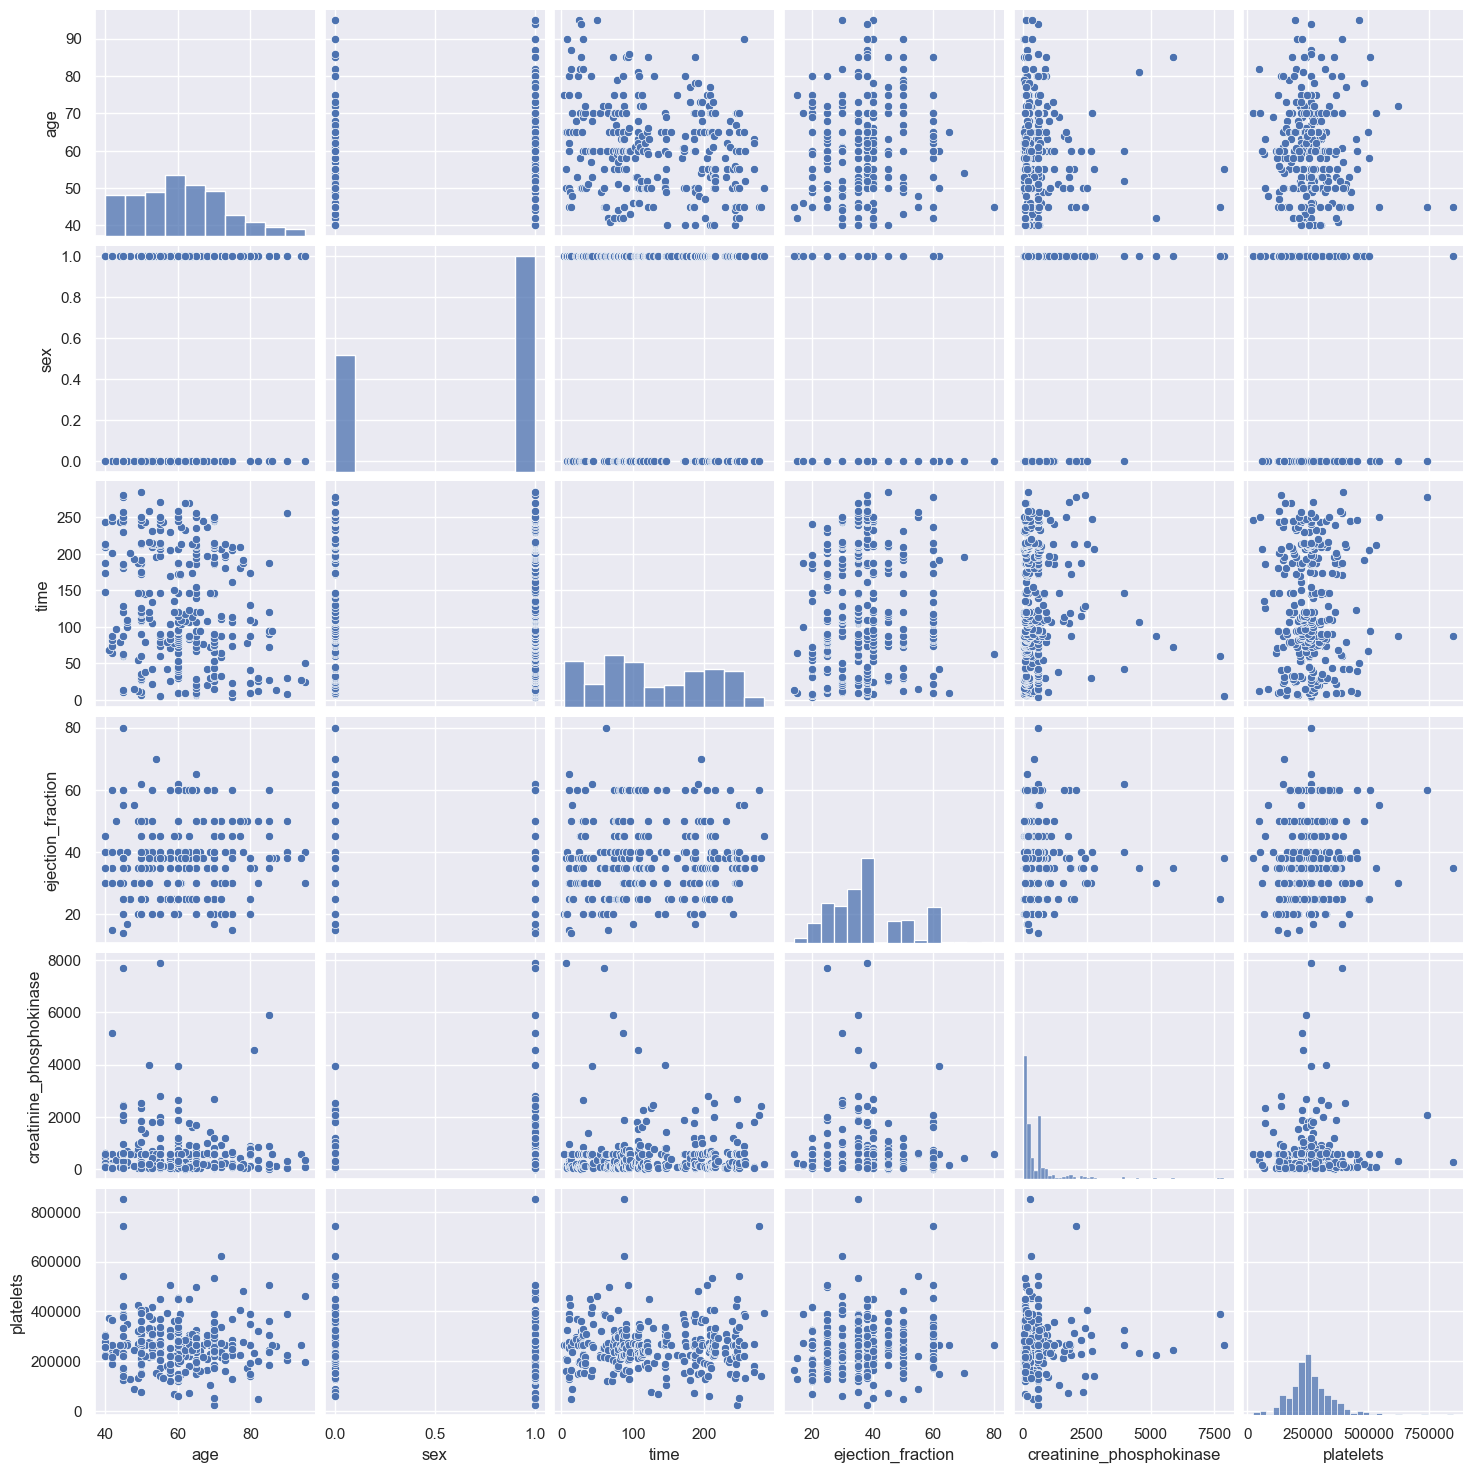

In [198]:
sns.pairplot(df[numerical_vals])
plt.show()

#### 3.1 Data Preparation
Before we start training our models we need to prepare the data and split it into train data and test data<br>
We achieve that by using Scikit-Learn library.<br>
Using the train_test_split() function with parameters as random_state ( this allows us to set a seed to reproduce teh results)<br>
and test_size that allows us to choose how much of the data we are using.<br>
First we take out the target label (in this case is DEATH_EVENT) thn we will split the data


In [199]:
# store all rows and columns apart from last column(label) in X
X = df.iloc[:,:(df.shape[1]-1)]
y = df['DEATH_EVENT']

Importing the train_test_split method and splitting the dataset.

In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.28,random_state=15)

Another check that is worth noting is that we have to look at the class distribution in training and testing. Is good to make sure that is divided evenly, in our case we see that is close related in proportion

In [201]:
y_train.value_counts(normalize=True)

DEATH_EVENT
0    0.67907
1    0.32093
Name: proportion, dtype: float64

In [202]:
y_test.value_counts(normalize=True)

DEATH_EVENT
0    0.678571
1    0.321429
Name: proportion, dtype: float64

We have  look one more time on our train data to make sure that is represented by 0 and 1 values.

In [203]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, 227 to 245
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       215 non-null    float64
 1   anaemia                   215 non-null    int64  
 2   creatinine_phosphokinase  215 non-null    int64  
 3   diabetes                  215 non-null    int64  
 4   ejection_fraction         215 non-null    int64  
 5   high_blood_pressure       215 non-null    int64  
 6   platelets                 215 non-null    float64
 7   serum_creatinine          215 non-null    float64
 8   serum_sodium              215 non-null    int64  
 9   sex                       215 non-null    int64  
 10  smoking                   215 non-null    int64  
 11  time                      215 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 21.8 KB


#### 4.0 Training Models
For beginning we will train the Logistic regression model using out train data. In this case we use 'lbfgs' solver but is worth taking in consideration that for small datasets, 'liblinear' is a good choice, whereas 'sag' and 'saga' are faster for large ones. In our cas we will go with the default .

In [204]:
from sklearn.linear_model import LogisticRegression
# create and train the model
# notice the class_weight parameter
ml_reg = LogisticRegression(solver='lbfgs',class_weight='balanced',max_iter=3000)
ml_reg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=3000)

Now that our model is fitted we can start to make predictions.

In [205]:
y_preds = ml_reg.predict(X_test)


Lets evaluate our model, first using accuracy as follows:

In [206]:
from sklearn.metrics import accuracy_score
print ('Accuracy is ',accuracy_score(y_test,y_preds))

Accuracy is  0.7380952380952381


To better view the results we can use a classification report from sklearn. And we can display it . As we can see the precision is slight unbalanced, this might be because there are more instances of 0 [0,203:1,96]

In [207]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.84      0.75      0.80        57
           1       0.58      0.70      0.63        27

    accuracy                           0.74        84
   macro avg       0.71      0.73      0.71        84
weighted avg       0.76      0.74      0.74        84



One more useful metric to consider  is the confusion matrix (it might show false positives and false negatives more clearly)

In [208]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_preds))

[[43 14]
 [ 8 19]]


(0.0, 2.0)

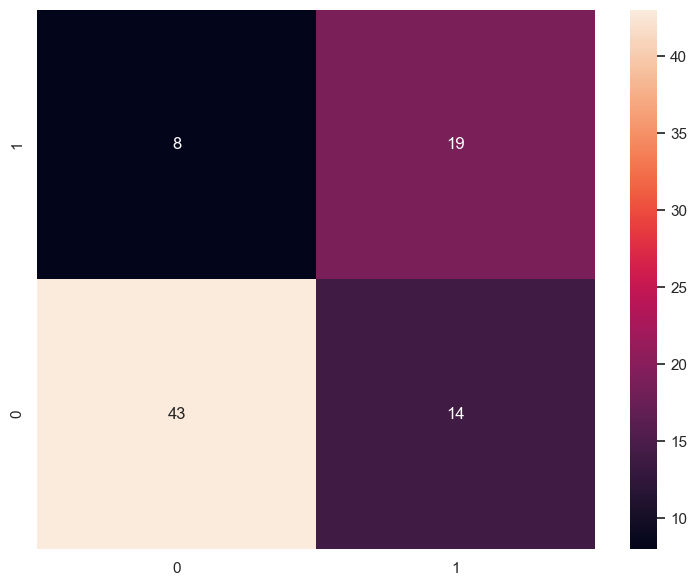

In [209]:
## Note that the heatmap doesn't display the same way as the confusion matrix above - the "correct" diagonal in this one is bottom left to top right)
ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,fmt="d")
ax.set_ylim([0,2])

To further help you understand the concepts of false positives/ negatives and the metrics presented above:

In [210]:
# dictionary
dict_df = {
'Actual':y_test,
'Predictions':y_preds,
'Correct':0
}
results = pd.DataFrame(dict_df)
results.head()

,Actual,Predictions,Correct
201,0,0,0
291,0,0,0
91,0,0,0
137,0,1,0
152,0,0,0


In [211]:
# get false positives
FP = results[(results.Actual==0) & (results.Predictions==1)].shape[0]
FN = results[(results.Actual==1) & (results.Predictions==0)].shape[0]
TP = results[(results.Actual==1) & (results.Predictions==1)].shape[0]
TN = results[(results.Actual==0) & (results.Predictions==0)].shape[0]

precision = TP / (TP + FP)<br>
recall is defined as: recall = TP / (TP + FN)<br>
And F1 is defined as: F1 = 2 * (precision * recall) / (precision + recall)<br>
As you can see the numbers are close related (precision and recall) from the above ones with the ones from the cell below.

In [212]:
precision = TP/(TP+FN)
recall = TP/(TP+FP)
f1 = 2*precision*recall/(precision+recall)
print(f'recall is {precision}')
print(f'precision is {recall}')
print(f'F1 is {f1}')

recall is 0.7037037037037037
precision is 0.5757575757575758
F1 is 0.6333333333333334


One useful techniques to compare and evaluate different models is called the ROC curve.<br>
One of the metrics used is the Area Under the Curve (AUC), a prefect classifier would have an AUC = 1

In [213]:
# import required libraries
from sklearn.metrics import roc_curve
# get false positive rates, true positive rates, for various thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_preds)

It should be noted that the higher the curve pushes toward the top-left corner, then the better your model is.

C:\Users\lapos\AppData\Local\Temp\ipykernel_24320\1380830846.py:5: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot([0,1],[0,1],'b:',label=['Random','Logistic Regression'])


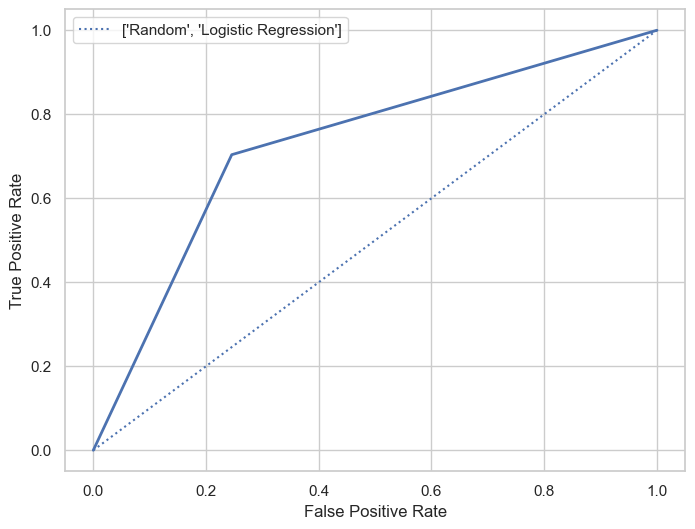

In [214]:
#plot the roc curve
sns.set_style('whitegrid')
fig = plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1],[0,1],'b:',label=['Random','Logistic Regression'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### 4.1 Training 3 different models (LogisticRegression,DecisionTreeClassifier,RandomForestClassifier)<br>
Now we will train different models to see exact how they evaluate and behave.<br>
First we import our classifiers<br>
Then we create a list will all of them<br>
After that we loop thru the list and fit a model<br>
Then extract the false positive rates, true positive rates, for various thresholds, <br>
And append them in a results list

In [215]:
# libraries for the various models we will be using
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
# Instantiate the classfiers and make a list
# notice the parameters for each classifie
classifiers = [LogisticRegression(solver='lbfgs',max_iter=4000,class_weight='balanced'),
DecisionTreeClassifier(random_state=15),
RandomForestClassifier(n_estimators=500,random_state=15)
]

In [216]:
# Data frames don't like append, but lists do
# List of dictionaries is then later turned into a dataframe.
results_lst = []
# Train the models and store the results
for cls in classifiers:
    # fit the data
    model = cls.fit(X_train, y_train)
    # get predictions as probabilities
    # notice that predict_proba returns array (n_samples, n_classes)
    yproba = model.predict_proba(X_test)[::,1]
    fpr, tpr, thres = roc_curve(y_test, yproba)
    # get the auc (area under the curve)
    auc = roc_auc_score(y_test, yproba)
    # add results to the table
    results_lst.append({'classifiers':cls.__class__.__name__,
    'fpr':fpr,
    'tpr':tpr,
    'auc':auc})
# Set name of the classifiers as index labels
results_df = pd.DataFrame(results_lst)
results_df.set_index('classifiers', inplace=True)

Displaying the results intoa  table, we notice that Random Forest had the best accuracy, now we only need to visualize the data thru a ROC Curve

In [217]:
display(results_df)

,fpr,tpr,auc
classifiers,,,
LogisticRegression,"[0.0, 0.0, 0.0, 0.017543859649122806, 0.017543...","[0.0, 0.037037037037037035, 0.1111111111111111...",0.799220
DecisionTreeClassifier,"[0.0, 0.12280701754385964, 1.0]","[0.0, 0.6666666666666666, 1.0]",0.771930
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.017543859649122806, 0.017543...","[0.0, 0.037037037037037035, 0.1481481481481481...",0.877193


#### 5 Compare results with a ROC curve

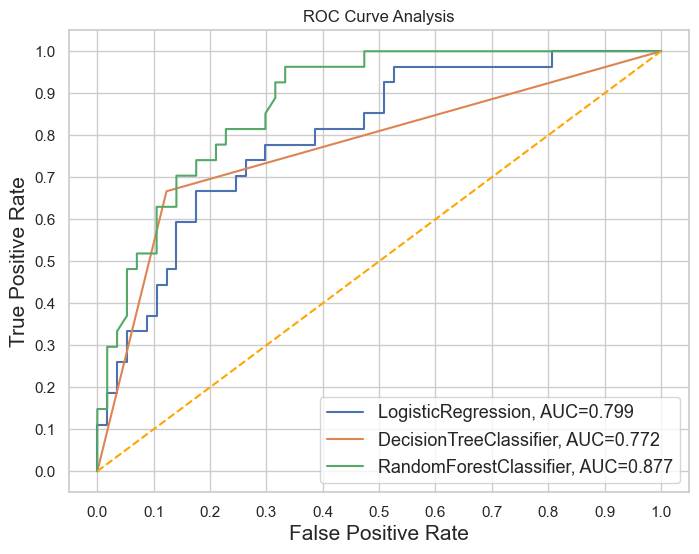

In [218]:
fig = plt.figure(figsize=(8,6))
for i in results_df.index:
    plt.plot(results_df.loc[i]['fpr'],
            results_df.loc[i]['tpr'],
            label="{}, AUC={:.3f}".format(i, results_df.loc[i]['auc']))

# plot the random model (diagonal)
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontsize=12)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()

According to the abo
ve ROC curve, clearly Random Forests is producing the best results.